<a href="https://colab.research.google.com/github/kabeerbora/ECON5625/blob/main/DAGs_Lecture_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx matplotlib dowhy pywhy

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# DAGs

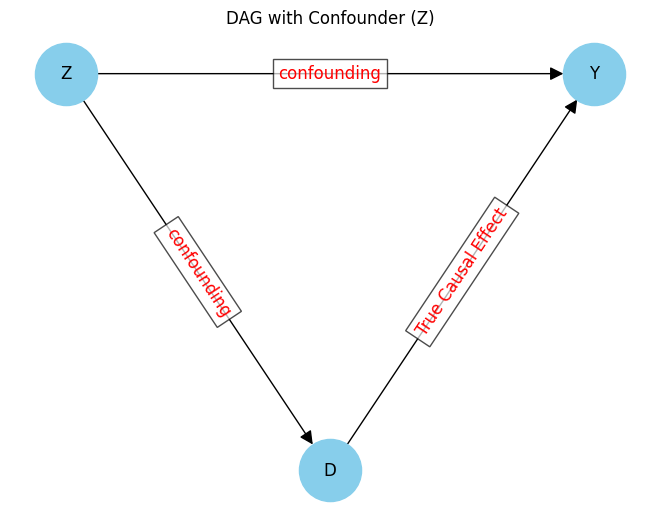

In [ ]:
G = nx.DiGraph()
G.add_edges_from([
    ("D", "Y"),    # X → Y
    ("Z", "D"),    # Z → X
    ("Z", "Y")     # Z → Y
])

pos = {"Z": (0, 1), "D": (1, 0), "Y": (2, 1)}
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", arrowsize=20)
edge_labels = {
    ("Z", "D"): "confounding",
    ("Z", "Y"): "confounding",
    ("D", "Y"): "True Causal Effect"
}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                             font_color="red", font_size=12,
                             label_pos=0.5, bbox=dict(facecolor='white', alpha=0.7))

plt.title("DAG with Confounder (Z)")
plt.show()

## Becker's DAG

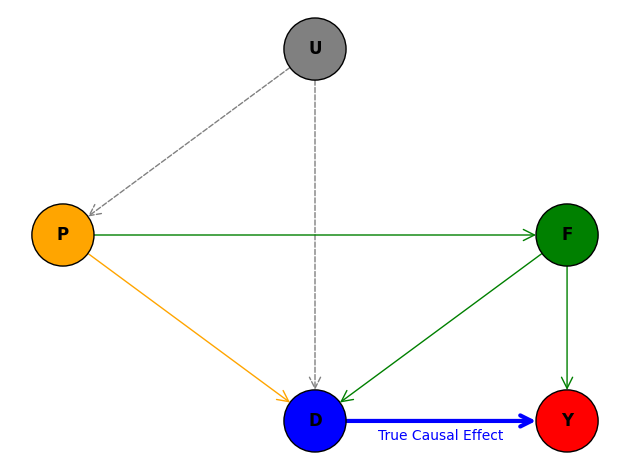

In [ ]:
G = nx.DiGraph()
G.add_node("U", color="gray", label="U")
G.add_node("P", color="orange", label="P")
G.add_node("F", color="green", label="F")
G.add_node("D", color="blue", label="D")
G.add_node("Y", color="red", label="Y")

G.add_edge("U", "P", color="gray", style="dashed")
G.add_edge("U", "D", color="gray", style="dashed")
G.add_edge("P", "D", color="orange", style="solid")
G.add_edge("P", "F", color="green", style="solid")
G.add_edge("F", "D", color="green", style="solid")
G.add_edge("F", "Y", color="green", style="solid")
G.add_edge("D", "Y", color="blue", style="solid", weight=3)

pos = {
    "U": (0, 1),
    "P": (-1, 0),
    "F": (1, 0),
    "D": (0, -1),
    "Y": (1, -1)
}
node_colors = [G.nodes[n]['color'] for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=node_colors,
                      edgecolors="black", linewidths=1)
for (u, v, data) in G.edges(data=True):
    nx.draw_networkx_edges(
        G, pos, edgelist=[(u, v)],
        edge_color=data['color'],
        style=data['style'],
        width=data.get('weight', 1),
        arrows=True,
        arrowstyle='->,head_width=0.4,head_length=0.8',
        node_size=2000
    )
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
plt.text(0.5, -1.1, "True Causal Effect", color='blue', fontsize=10, ha='center')
plt.axis('off')
plt.tight_layout()
plt.show()

### Adding a backdoor to Becker's DAG

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the Directed Acyclic Graph (DAG)
G = nx.DiGraph()
G.add_node("U", color="gray", label="U")
G.add_node("P", color="orange", label="P")
G.add_node("F", color="green", label="F")
G.add_node("D", color="blue", label="D")
G.add_node("Y", color="red", label="Y")

G.add_edge("U", "P", color="gray", style="dashed")
G.add_edge("U", "D", color="gray", style="dashed")
G.add_edge("P", "D", color="orange", style="solid")
G.add_edge("P", "F", color="green", style="solid")
G.add_edge("F", "D", color="green", style="solid")
G.add_edge("F", "Y", color="green", style="solid")
G.add_edge("D", "Y", color="blue", style="solid", weight=3)

# Define positions
pos = {
    "U": (0, 1),
    "P": (-1, 0),
    "F": (1, 0),
    "D": (0, -1),
    "Y": (1, -1)
}

# Draw nodes and existing edges
node_colors = [G.nodes[n]['color'] for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=node_colors,
                      edgecolors="black", linewidths=1)
for (u, v, data) in G.edges(data=True):
    nx.draw_networkx_edges(
        G, pos, edgelist=[(u, v)],
        edge_color=data['color'],
        style=data['style'],
        width=data.get('weight', 1),
        arrows=True,
        arrowstyle='->,head_width=0.4,head_length=0.8',
        node_size=2000
    )

# Draw a curved edge from U to Y (going around the DAG)
nx.draw_networkx_edges(
    G, pos,
    edgelist=[("U", "Y")],
    edge_color="purple",
    style="dashed",
    width=2,
    arrows=True,
    arrowstyle='->,head_width=0.4,head_length=0.8',
    connectionstyle="arc3,rad=-0.8",  # Adjust 'rad' for curvature
    node_size=2000
)

nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
plt.text(0.5, -1.1, "True Causal Effect", color='blue', fontsize=10, ha='center')
plt.axis('off')
plt.tight_layout()
plt.show()

## Multicollinearity \& Confounders

In [ ]:
import statsmodels.api as sm
import numpy as np

np.random.seed(42)
ability = np.random.normal(0, 1, 1000)
education = 0.8 * ability + np.random.normal(0, 0.2, 1000)
earnings = 0.5 * education + 0.7 * ability + np.random.normal(0, 1, 1000)

X = sm.add_constant(np.column_stack([education, ability]))
model = sm.OLS(earnings, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     622.4
Date:                Sat, 19 Jul 2025   Prob (F-statistic):          3.86e-176
Time:                        09:21:58   Log-Likelihood:                -1401.5
No. Observations:                1000   AIC:                             2809.
Df Residuals:                     997   BIC:                             2824.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0061      0.031      0.197      0.8

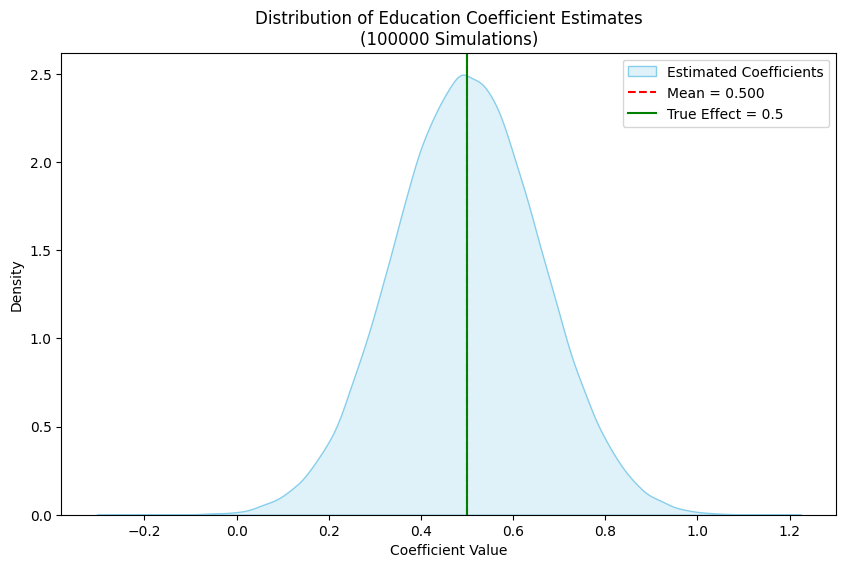

Mean estimate: 0.4999
Standard deviation: 0.1584
95% of estimates between: 0.1901 and 0.8107


In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

true_effect = 0.5
n_simulations = 100000
sample_size = 1000
estimates = []

for _ in range(n_simulations):

    ability = np.random.normal(0, 1, sample_size)
    education = 0.8 * ability + np.random.normal(0, 0.2, sample_size)
    earnings = true_effect * education + 0.7 * ability + np.random.normal(0, 1, sample_size)


    X = sm.add_constant(np.column_stack([education, ability]))
    model = sm.OLS(earnings, X).fit()
    estimates.append(model.params[1])

plt.figure(figsize=(10, 6))
sns.kdeplot(estimates, fill=True, color='skyblue', label='Estimated Coefficients')
plt.axvline(np.mean(estimates), color='red', linestyle='--',
           label=f'Mean = {np.mean(estimates):.3f}')
plt.axvline(true_effect, color='green', linestyle='-',
          label=f'True Effect = {true_effect}')
plt.title(f'Distribution of Education Coefficient Estimates\n({n_simulations} Simulations)')
plt.xlabel('Coefficient Value')
plt.ylabel('Density')
plt.legend()
plt.show()

print(f"Mean estimate: {np.mean(estimates):.4f}")
print(f"Standard deviation: {np.std(estimates):.4f}")
print(f"95% of estimates between: {np.percentile(estimates, 2.5):.4f} and {np.percentile(estimates, 97.5):.4f}")

## Colliders

### Simple DAG

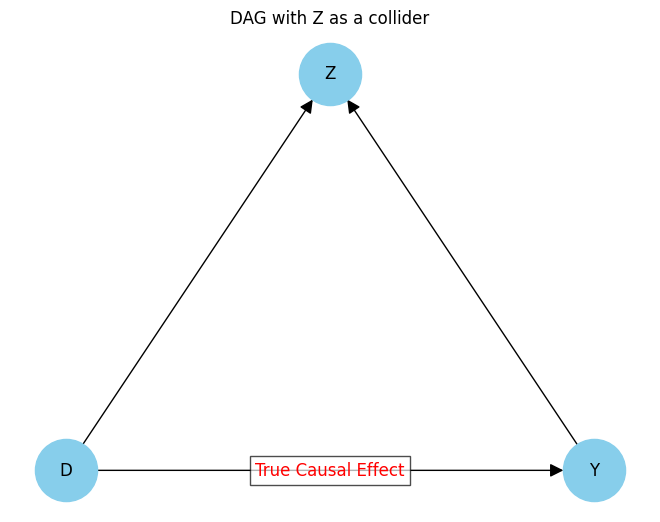

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([
    ("D", "Z"),
    ("Y", "Z"),
    ("D", "Y")
])

pos = {
    "D": (0, 0),
    "Y": (2, 0),
    "Z": (1, 1)
}

nx.draw(G, pos, with_labels=True, node_size=2000,
        node_color="skyblue", arrowsize=20)

edge_labels = {
    ("D", "Z"): "",
    ("Y", "Z"): "",
    ("D", "Y"): "True Causal Effect"
}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                             font_color="red", font_size=12,
                             label_pos=0.5,
                             bbox=dict(facecolor='white', alpha=0.7))

plt.title("DAG with Z as a collider")
plt.show()

### Gender Discrimination DAG

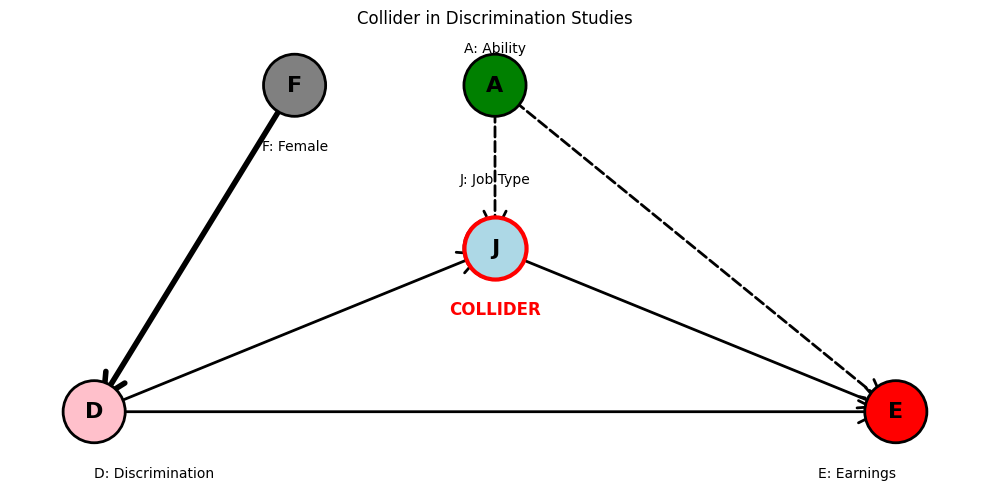

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the DAG with single-letter nodes
G = nx.DiGraph()
G.add_edges_from([
    ("D", "E"),  # Direct effect
    ("D", "J"),  # Mediation path
    ("J", "E"),  # Mediation path
    ("A", "J"),  # Hidden bias
    ("A", "E"),   # Hidden bias
    ("F", "D")   # New edge from Female to Discrimination
])

# Position nodes
pos = {
    "F": (0.5, 1),  # New Female node
    "D": (0, 0),    # Discrimination
    "J": (1, 0.5),  # Job Type (Collider)
    "E": (2, 0),    # Earnings
    "A": (1, 1)     # Ability
}

# Custom styling
plt.figure(figsize=(10, 5))
nx.draw_networkx_nodes(
    G, pos, node_size=2000,
    node_color=["pink", "red", "lightblue", "green", "gray"],
    edgecolors="black",
    linewidths=2
)

# Highlight collider with red border
nx.draw_networkx_nodes(
    G, pos, nodelist=["J"],
    node_size=2000,
    node_color="lightblue",
    edgecolors="red",
    linewidths=3
)

# Draw edges - regular edges
nx.draw_networkx_edges(
    G, pos,
    edgelist=[("D", "E"), ("D", "J"), ("J", "E")],
    arrowstyle="->,head_width=0.4,head_length=0.8",
    arrowsize=20,
    width=2,
    edge_color="black"
)

# Draw bold edge from F to D
nx.draw_networkx_edges(
    G, pos,
    edgelist=[("F", "D")],
    arrowstyle="->,head_width=0.4,head_length=0.8",
    arrowsize=20,
    width=4,
    edge_color="black"
)

# Draw dashed edges from A
nx.draw_networkx_edges(
    G, pos,
    edgelist=[("A", "J"), ("A", "E")],
    arrowstyle="->,head_width=0.4,head_length=0.8",
    arrowsize=20,
    width=2,
    edge_color="black",
    style="dashed"
)

# Labels with larger font
nx.draw_networkx_labels(
    G, pos,
    font_size=16,
    font_weight="bold"
)

# Annotations
plt.text(1, 0.3, "COLLIDER",
         color='red', ha='center', fontsize=12, fontweight='bold')
plt.text(0, -0.2, "D: Discrimination", ha='left', fontsize=10)
plt.text(2, -0.2, "E: Earnings", ha='right', fontsize=10)
plt.text(1, 1.1, "A: Ability", ha='center', fontsize=10)
plt.text(1, 0.7, "J: Job Type", ha='center', fontsize=10)
plt.text(0.5, 0.8, "F: Female", ha='center', fontsize=10)

plt.title("Collider in Discrimination Studies", pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

#### DGP regression

In [ ]:
!pip install stargazer
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer

# Set seed for reproducibility
np.random.seed(61)

# Generate data with your specified parameters
tb = pd.DataFrame({
    'female': np.random.binomial(1, 0.5, size=10000),  # 50% female
    'ability': np.random.normal(size=10000)             # Standard normal ability
})

# Create discrimination variable (1 for women, 0 for men)
tb['discrimination'] = tb.female.copy()

# Generate occupation and wage according to your equations
tb['occupation'] = (1 + 2*tb['ability'] + 0*tb['female']
                   - 2*tb['discrimination'] + np.random.normal(size=10000))
tb['wage'] = (1 - 1*tb['discrimination'] + 1*tb['occupation']
             + 2*tb['ability'] + np.random.normal(size=10000))

# Run regression models
lm_1 = sm.OLS.from_formula('wage ~ female', data=tb).fit()
lm_2 = sm.OLS.from_formula('wage ~ female + occupation', data=tb).fit()
lm_3 = sm.OLS.from_formula('wage ~ female + occupation + ability', data=tb).fit()

# Create regression table
st = Stargazer((lm_1, lm_2, lm_3))
st.custom_columns(["Biased Unconditional", "Biased", "Unbiased Conditional"], [1, 1, 1])
print(st.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{3}{c}{\textit{Dependent variable: wage}} \
\cr \cline{2-4}
\\[-1.8ex] & \multicolumn{1}{c}{Biased Unconditional} & \multicolumn{1}{c}{Biased} & \multicolumn{1}{c}{Unbiased Conditional}  \\
\\[-1.8ex] & (1) & (2) & (3) \\
\hline \\[-1.8ex]
 Intercept & 1.966$^{***}$ & 0.177$^{***}$ & 0.978$^{***}$ \\
& (0.059) & (0.020) & (0.017) \\
 ability & & & 1.972$^{***}$ \\
& & & (0.023) \\
 female & -2.901$^{***}$ & 0.632$^{***}$ & -0.945$^{***}$ \\
& (0.085) & (0.029) & (0.028) \\
 occupation & & 1.805$^{***}$ & 1.013$^{***}$ \\
& & (0.006) & (0.010) \\
\hline \\[-1.8ex]
 Observations & 10000 & 10000 & 10000 \\
 $R^2$ & 0.105 & 0.910 & 0.949 \\
 Adjusted $R^2$ & 0.105 & 0.910 & 0.949 \\
 Residual Std. Error & 4.229 (df=9998) & 1.340 (df=9997) & 1.009 (df=9996) \\
 F Statistic & 1175.383$^{***}$ (df=1; 9998) & 50643.298$^{***}$ (df=2; 9997) & 62113.677$^{***}$ (df=3; 9996) 

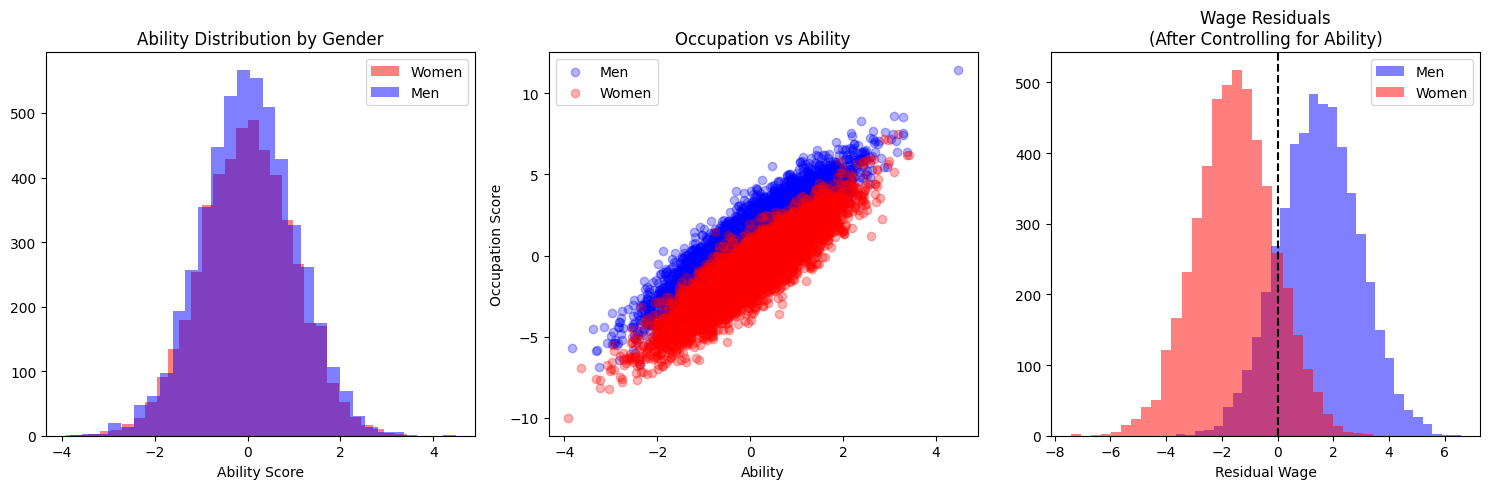

In [ ]:
plt.figure(figsize=(15, 5))

# Plot 1: Ability distribution by gender
plt.subplot(131)
plt.hist(tb[tb.female==1].ability, bins=30, alpha=0.5, label='Women', color='red')
plt.hist(tb[tb.female==0].ability, bins=30, alpha=0.5, label='Men', color='blue')
plt.title("Ability Distribution by Gender")
plt.xlabel("Ability Score")
plt.legend()

# Plot 2: Occupation vs ability by gender
plt.subplot(132)
plt.scatter(tb[tb.female==0].ability, tb[tb.female==0].occupation,
           alpha=0.3, color='blue', label='Men')
plt.scatter(tb[tb.female==1].ability, tb[tb.female==1].occupation,
           alpha=0.3, color='red', label='Women')
plt.title("Occupation vs Ability")
plt.xlabel("Ability")
plt.ylabel("Occupation Score")
plt.legend()

# Plot 3: Wage residuals after controlling for ability
model = sm.OLS.from_formula('wage ~ ability', data=tb).fit()
tb['residual_wage'] = model.resid

plt.subplot(133)
plt.hist(tb[tb.female==0].residual_wage, bins=30, alpha=0.5, color='blue', label='Men')
plt.hist(tb[tb.female==1].residual_wage, bins=30, alpha=0.5, color='red', label='Women')
plt.axvline(0, color='black', linestyle='--')
plt.title("Wage Residuals\n(After Controlling for Ability)")
plt.xlabel("Residual Wage")
plt.legend()

plt.tight_layout()
plt.show()

female
1    0.5016
0    0.4984
Name: proportion, dtype: float64


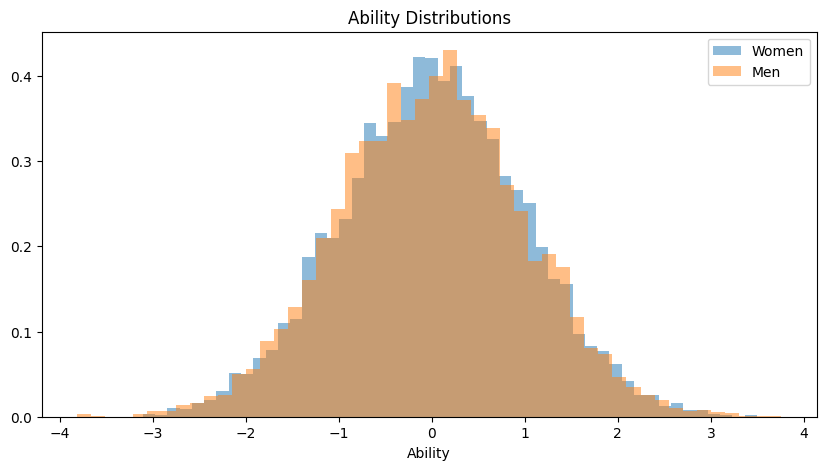

In [ ]:
# Generate balanced data
n = 10000
data = pd.DataFrame({
    'female': np.random.binomial(1, 0.5, n),
    'ability': np.random.normal(0, 1, n)  # Same distribution for all
})

# Verification
print(data['female'].value_counts(normalize=True))  # Should show ~50/50

# Improved visualization
plt.figure(figsize=(10,5))
plt.hist(data[data.female==1].ability,
         bins=50, alpha=0.5, density=True, label='Women')
plt.hist(data[data.female==0].ability,
         bins=50, alpha=0.5, density=True, label='Men')
plt.title("Ability Distributions")
plt.xlabel("Ability")
plt.legend()
plt.show()

### Police Force and Race

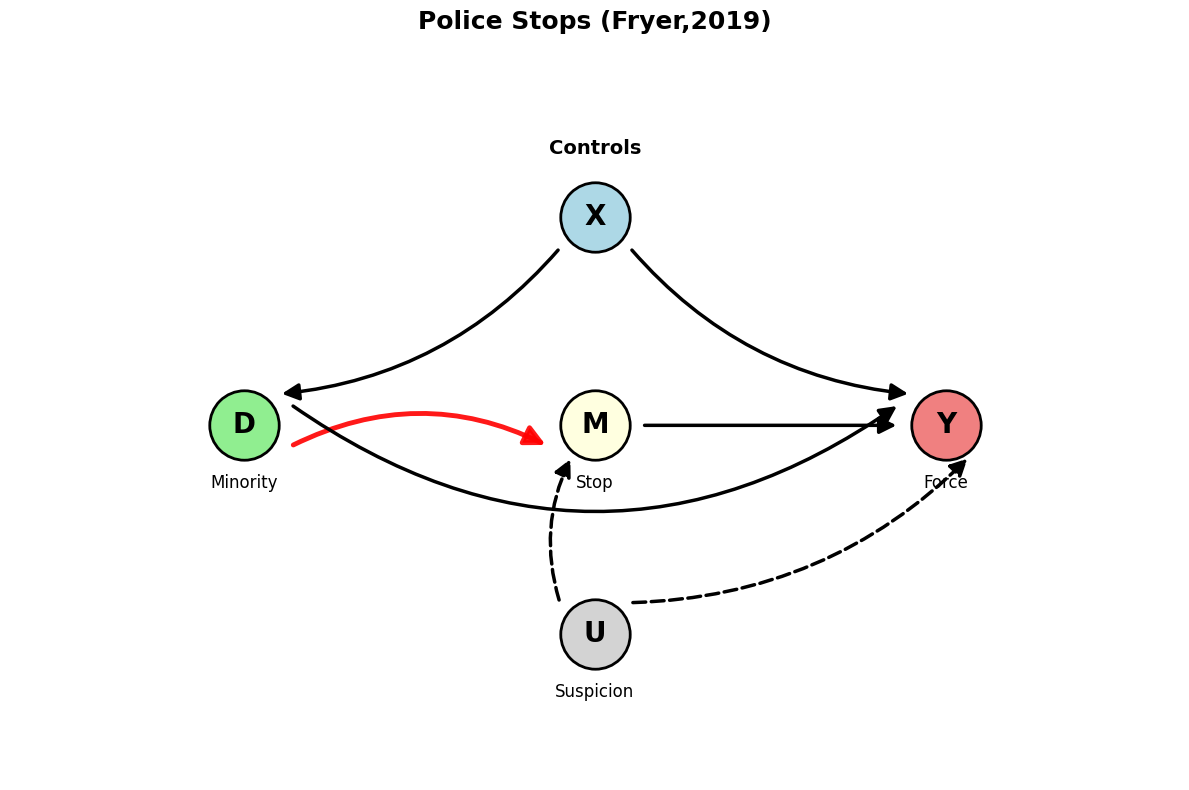

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyArrowPatch

G = nx.DiGraph()
G.add_edges_from([
    ("X", "D"),
    ("X", "Y"),
    ("D", "M"),
    ("D", "Y"),
    ("M", "Y"),
    ("U", "M"),
    ("U", "Y"),
])

pos = {
    "X": (2, 2.5),
    "D": (0.5, 1.5),
    "M": (2, 1.5),
    "Y": (3.5, 1.5),
    "U": (2, 0.5)
}

plt.figure(figsize=(12, 8))

node_size = 2500
node_colors = {
    "X": "lightblue",
    "D": "lightgreen",
    "M": "lightyellow",
    "Y": "lightcoral",
    "U": "lightgray"
}

for node in G.nodes():
    nx.draw_networkx_nodes(
        G, pos, nodelist=[node],
        node_size=node_size,
        node_color=node_colors[node],
        edgecolors="black",
        linewidths=2
    )

ax = plt.gca()

x_d_arrow = FancyArrowPatch(
    posA=(pos["X"][0]-0.15, pos["X"][1]-0.15),
    posB=(pos["D"][0]+0.15, pos["D"][1]+0.15),
    arrowstyle="-|>",
    connectionstyle="arc3,rad=-0.2",
    linewidth=2.5,
    color="black",
    mutation_scale=25
)
ax.add_patch(x_d_arrow)

x_y_arrow = FancyArrowPatch(
    posA=(pos["X"][0]+0.15, pos["X"][1]-0.15),
    posB=(pos["Y"][0]-0.15, pos["Y"][1]+0.15),
    arrowstyle="-|>",
    connectionstyle="arc3,rad=0.2",
    linewidth=2.5,
    color="black",
    mutation_scale=25
)
ax.add_patch(x_y_arrow)

d_m_arrow = FancyArrowPatch(
    posA=(pos["D"][0]+0.2, pos["D"][1]-0.1),
    posB=(pos["M"][0]-0.2, pos["M"][1]-0.1),
    arrowstyle="-|>",
    connectionstyle="arc3,rad=-0.25",
    linewidth=3.5,
    color="red",
    mutation_scale=30,
    alpha=0.9
)
ax.add_patch(d_m_arrow)

d_y_arrow = FancyArrowPatch(
    posA=(pos["D"][0]+0.2, pos["D"][1]+0.1),
    posB=(pos["Y"][0]-0.2, pos["Y"][1]+0.1),
    arrowstyle="-|>",
    connectionstyle="arc3,rad=0.35",
    linewidth=2.5,
    color="black",
    mutation_scale=25
)
ax.add_patch(d_y_arrow)

m_y_arrow = FancyArrowPatch(
    posA=(pos["M"][0]+0.2, pos["M"][1]),
    posB=(pos["Y"][0]-0.2, pos["Y"][1]),
    arrowstyle="-|>",
    linewidth=2.5,
    color="black",
    mutation_scale=25
)
ax.add_patch(m_y_arrow)

u_m_arrow = FancyArrowPatch(
    posA=(pos["U"][0]-0.15, pos["U"][1]+0.15),
    posB=(pos["M"][0]-0.1, pos["M"][1]-0.15),
    arrowstyle="-|>",
    connectionstyle="arc3,rad=-0.2",
    linewidth=2.5,
    color="black",
    linestyle="dashed",
    mutation_scale=25
)
ax.add_patch(u_m_arrow)

u_y_arrow = FancyArrowPatch(
    posA=(pos["U"][0]+0.15, pos["U"][1]+0.15),
    posB=(pos["Y"][0]+0.1, pos["Y"][1]-0.15),
    arrowstyle="-|>",
    connectionstyle="arc3,rad=0.2",
    linewidth=2.5,
    color="black",
    linestyle="dashed",
    mutation_scale=25
)
ax.add_patch(u_y_arrow)

label_pos = {k: (v[0], v[1]) for k, v in pos.items()}
nx.draw_networkx_labels(
    G, label_pos,
    font_size=20,
    font_weight="bold",
    font_color="black"
)

plt.text(2, 2.8, "Controls", ha='center', fontsize=14, fontweight='bold')
plt.text(0.5, 1.2, "Minority", ha='center', fontsize=12)
plt.text(2, 1.2, "Stop", ha='center', fontsize=12)
plt.text(3.5, 1.2, "Force", ha='center', fontsize=12)
plt.text(2, 0.2, "Suspicion", ha='center', fontsize=12)
plt.title("Police Stops (Fryer,2019)", fontsize=18, fontweight='bold', pad=30)
plt.xlim(-0.5, 4.5)
plt.ylim(-0.2, 3.2)
plt.axis('off')
plt.tight_layout()
plt.show()

# Potential Outcomes

## Independence Assumption

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import combinations
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file):
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)



def gap():
    sdo = pd.DataFrame({
        'y1': (7, 5, 5, 7, 4, 10, 1, 5, 3, 9),
        'y0' : (1, 6, 1, 8, 2, 1, 10, 6, 7, 8),
        'random' : np.random.normal(size=10)})
    sdo.sort_values('random', inplace=True)
    sdo['d'] = [1,1,1,1,1,0,0,0,0,0]
    sdo['y'] = sdo['d']*sdo['y1'] + (1-sdo['d'])*sdo['y0']

    sdo = np.mean(sdo.y.values[0:5] - sdo.y.values[5:10])

    return sdo


sim = [gap() for x in range(1000)]
np.mean(sim)

np.float64(0.5668)